In [1]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [2]:
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude
Beta=0           #Inclinação 
GSC=1.367         #Constante solar  KW/m^2

In [3]:
df=pd.read_csv("Dados Segundo exercicio.csv" , encoding ='UTF-8' , sep=";")



NUMERO DO DIA NO ANO

In [4]:
df['n']= df['Dia']  + (df['Mês'] -1)*30 +df['Cor']


CALCULO DA HORA SOLAR 

In [5]:
df['B']= (360/364)*(df['n']-81)

In [6]:
df['E']= 9.87*np.sin(np.radians(2*df['B']))-7.53*np.cos(np.radians(df['B']))-1.5*np.sin(np.radians(df['B']))

In [7]:
df['Corhora']= (4*(L_O-L)+df['E'])/60

In [8]:
HL=14.50


In [9]:
df['HS']= HL+df['Corhora']


ÂNGULO HORARIO

In [10]:
df['Omega']= (df['HS']-12)*15

DECLINAÇÃO SOLAR 

In [11]:
df['sigma']= 23.45*np.sin(np.radians(360/365*(284+df['n'])))

ÂNGULO ZENITAL 

In [12]:
df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(df['sigma']))*(np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega'])))))



ÂNGULO DE INCIDENCIA 

In [13]:
df['teta']=np.degrees(np.arccos(np.cos(np.radians(L_a+Beta)*np.cos(np.radians(df['sigma']))*np.cos(np.radians(df['Omega']))+np.sin(np.radians(L_a+Beta))*np.sin(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTE SOBRE UMA SUPERFICIE HORIZONTAL EM UM PONTO DA TERRA

In [14]:
df['GO']=GSC*(1+0.033*np.cos(np.radians((360*df['n'])/365)))*np.cos(np.radians(df['teta_z']))


ÂNGULO HORÁRIO DO PÔR DO SOL 

In [15]:
df['omega_s']=np.degrees(np.arccos((-np.tan(np.radians(L_a))*np.tan(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTRE INTEGRADA HORARI SOBRE SUPERFICIE HORIZONTAL 

In [16]:
df['HO']=((2.75*10**4)*GSC*((1+0.033*np.cos(np.radians((360*df['n'])/365))))*(((1.75*10**-2)*df['omega_s']*np.sin(np.radians(df['sigma']))*np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.sin(np.radians(df['omega_s'])))))/1000


In [17]:
df['H']=pd.read_csv("Irradiação integrada diaria.csv" , encoding ='UTF-8' , sep=";")


In [18]:
df['KT']=df['H']/df['HO']


In [19]:
df['Hd/H']=0.775+0.0065*(df['omega_s']-90)-(0.505+0.00455*(df['omega_s']-90))*np.cos(np.radians(115*df['KT']-103))


In [20]:
df['Hd']=df['Hd/H']*df['H']


In [21]:
df['Hb']=df['H']-df['Hd']


Text(0, 0.5, 'Irradiação Solar ')

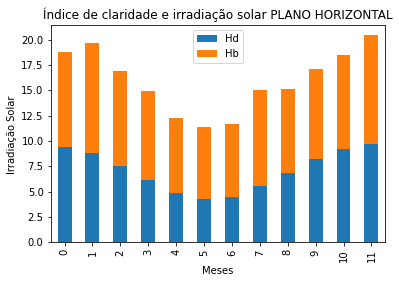

In [22]:
df[["Hd", "Hb", ]].plot(kind="bar", stacked=True)
plt.title("Índice de claridade e irradiação solar PLANO HORIZONTAL")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

Superficie no hemisferio Sul  

In [23]:
Beta_incli=60

In [24]:
df['omega_s*']=np.degrees(np.arccos((-np.tan(np.radians(L_a+Beta_incli))*np.tan(np.radians(df['sigma'])))))


In [25]:
df['Rb']=(np.cos(np.radians(L_a+Beta_incli))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s*']))+(np.pi/180)*df['omega_s*']*np.sin(np.radians(L_a+Beta_incli))*np.sin(np.radians(df['sigma'])))/(np.cos(np.radians(L_a))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s']))+(np.pi/180)*df['omega_s']*np.sin(np.radians(L_a))*np.sin(np.radians(df['sigma'])))


In [26]:
rho=0.2

In [33]:
df['R']=(1-df['Hd/H'])*df['Rb']+df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))


In [34]:
df['HT']=df['R']*df['H']


In [35]:
df['HTb']=(1-df['Hd/H'])*df['Rb']*df['H']


In [36]:
df['HTd']=df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)*df['H']


In [37]:
df['HTr']=rho*(((1-np.cos(np.radians(Beta_incli)))/2))*df['H']
df


,Dia,Cor,Mês,n,B,E,Corhora,HS,Omega,sigma,...,Hd/H,Hd,Hb,omega_s*,Rb,R,HT,HTb,HTd,HTr
0,15,0,1,15,-65.274725,-9.286743,-0.045526,14.454474,36.817114,-21.269474,...,0.501132,9.417272,9.374728,73.289809,0.404138,0.627460,11.791236,3.788682,7.062954,0.9396
1,15,1,2,46,-34.615385,-14.573582,-0.133640,14.366360,35.495405,-13.289156,...,0.446415,8.806876,10.921124,79.952779,0.557303,0.693326,13.677931,6.086373,6.605157,0.9864
2,15,-1,3,74,-6.923077,-9.656338,-0.051686,14.448314,36.724715,-2.818879,...,0.447020,7.563581,9.356419,87.915719,0.800716,0.828045,14.010516,7.491831,5.672686,0.8460
3,15,0,4,105,23.736264,-0.223084,0.105535,14.605535,39.083029,9.414893,...,0.409361,6.101122,8.802878,97.035167,1.184166,1.056435,15.745110,10.424069,4.575841,0.7452
4,15,0,5,135,53.406593,3.754880,0.171835,14.671835,40.077520,18.791918,...,0.395092,4.864378,7.447622,104.556684,1.608744,1.319461,16.245199,11.981316,3.648284,0.6156
5,15,1,6,166,84.065934,-0.240580,0.105244,14.605244,39.078655,23.314410,...,0.375049,4.280057,7.131943,108.561923,1.883374,1.508303,17.212759,13.432117,3.210043,0.5706
6,15,1,7,196,113.736264,-5.615811,0.015656,14.515656,37.734847,21.517336,...,0.384968,4.490268,7.173732,106.930811,1.767094,1.425545,16.627559,12.676658,3.367701,0.5832
7,15,2,8,227,144.395604,-4.094882,0.041005,14.541005,38.115080,13.783564,...,0.367588,5.543221,9.536779,100.439840,1.362691,1.187474,17.907101,12.995685,4.157416,0.7540
8,15,3,9,258,175.054945,5.677410,0.203877,14.703877,40.558152,2.216887,...,0.451463,6.826123,8.293877,91.638525,0.942038,0.905340,13.688740,7.813148,5.119592,0.7560
9,15,3,10,288,204.725275,14.966751,0.358699,14.858699,42.880488,-9.599397,...,0.476679,8.168366,8.967634,82.823644,0.636668,0.740691,12.692479,5.709405,6.126275,0.8568


Text(0, 0.5, 'Irradiação Solar ')

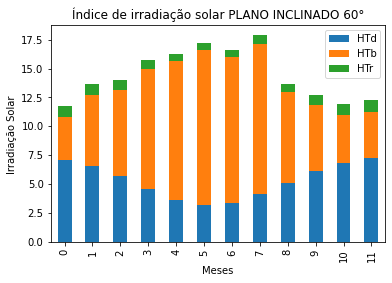

In [38]:
df[["HTd", "HTb", "HTr"]].plot(kind="bar", stacked=True)
plt.title("Índice de irradiação solar PLANO INCLINADO 60°")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

In [39]:
df1=pd.DataFrame({"Mês":df['Mês'],"Omega_s*":df['omega_s*'],"Rb*":df['Rb'],"R":df['R'],"HT":df['HT'],"HTd":df['HTd'],"HTb":df['HTb'],"HTr":df['HTr']})
df1

,Mês,Omega_s*,Rb*,R,HT,HTd,HTb,HTr
0,1,73.289809,0.404138,0.627460,11.791236,7.062954,3.788682,0.9396
1,2,79.952779,0.557303,0.693326,13.677931,6.605157,6.086373,0.9864
2,3,87.915719,0.800716,0.828045,14.010516,5.672686,7.491831,0.8460
3,4,97.035167,1.184166,1.056435,15.745110,4.575841,10.424069,0.7452
4,5,104.556684,1.608744,1.319461,16.245199,3.648284,11.981316,0.6156
5,6,108.561923,1.883374,1.508303,17.212759,3.210043,13.432117,0.5706
6,7,106.930811,1.767094,1.425545,16.627559,3.367701,12.676658,0.5832
7,8,100.439840,1.362691,1.187474,17.907101,4.157416,12.995685,0.7540
8,9,91.638525,0.942038,0.905340,13.688740,5.119592,7.813148,0.7560
9,10,82.823644,0.636668,0.740691,12.692479,6.126275,5.709405,0.8568
